In [1]:
import src.get_data as get_data
import src.load_data as load
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import datetime 
from pandas_datareader import data
import datetime as dt
import time 

from keras.callbacks import History 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model, save_model

import time
from sklearn import metrics

WINDOW = 22

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8


import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [11]:


"""
    "DJA": {"name": "Dow Jones Composite", "country": "USA"},
    "DJI": {"name": "Dow Jones Industrial Average", "country": "USA"},
    "DJT": {"name": "Dow Jones Transportation Average", "country": "USA"},
    "DJU": {"name": "Dow Jones Utility Average", "country": "USA"},
    "NYA": {"name": "NYSE Composite", "country": "USA"},
    "NIN": {"name": "NYSE International 100", "country": "USA"},
    "NTM": {"name": "NYSE TMT", "country": "USA"},
    "NUS": {"name": "NYSE US 100", "country": "USA"},
    "NWL": {"name": "NYSE World Leaders", "country": "USA"},
    "IXBK":{"name": "NASDAQ Bank", "country": "USA"},
    "NBI": {"name": "NASDAQ Biotech", "country": "USA"},
    "IXIC":{"name": "NASDAQ Composite", "country": "USA"},
    "IXK": {"name": "NASDAQ Computer", "country": "USA"},
    "IXF": {"name": "NASDAQ Financial 100", "country": "USA"},
    "IXID":{"name": "NASDAQ Industrial", "country": "USA"},
    "IXIS":{"name": "NASDAQ Insurance", "country": "USA"},
    "IXQ": {"name": "NASDAQ NNM Composite", "country": "USA"},
    "IXFN":{"name": "NASDAQ Other Finance", "country": "USA"},
    "IXUT":{"name": "NASDAQ Telecommunications", "country": "USA"},
    "IXTR":{"name": "NASDAQ Transportation", "country": "USA"},
    "NDX": {"name": "NASDAQ-100 (DRM)", "country": "USA"},
    "OEX": {"name": "S&P 100 Index", "country": "USA"},
    "MID": {"name": "S&P 400 Midcap Index", "country": "USA"},
    "GSPC":{"name": "S&P 500 Index", "country": "USA"},
    "SPSUPX":{"name": "S&P Composite 1500 Index", "country": "USA"},
    "SML": {"name": "S&P Smallcap 600 Index", "country": "USA"},
    "XAX": {"name": "AMEX COMPOSITE INDEX", "country": "USA"},
    "IIX": {"name": "AMEX INTERACTIVE WEEK INTERNET", "country": "USA"},
    "NWX": {"name": "AMEX NETWORKING INDEX", "country": "USA"},
    "PSE": {"name": "ArcaEx Tech 100 Index", "country": "USA"},
    "DWC": {"name": "DJ WILSHIRE 5000", "country": "USA"},
    "XMI": {"name": "MAJOR MARKET INDEX", "country": "USA"},
    "SOXX": {"name": "PHLX SEMICONDUCTOR SECTOR INDEX", "country": "USA"},
    "DOT": {"name": "PHLX THESTREET.COM INTERNET SEC", "country": "USA"},
    "RUI": {"name": "RUSSELL 1000 INDEX", "country": "USA"},
    "RUT": {"name": "RUSSELL 2000 INDEX", "country": "USA"},
    "RUA": {"name": "RUSSELL 3000 INDEX", "country": "USA"},
    "MERV": {"name": "MerVal", "country": "?"},
    "BVSP": {"name": "Bovespa", "country": "?"},
    "GSPTSE": {"name": "S&P TSX Composite", "country": "?"},
    "MXX": {"name": "IPC", "country": "?"},
    "GSPC": {"name": "500 Index", "country": "?"},
    "AORD": {"name": "All Ordinaries", "country": "Australia"},
    "SSEC": {"name": "Shanghai Composite", "country": "China"},
    "HSI": {"name": "Hang Seng", "country": "Hong Kong"},
    "BSESN": {"name": "BSE", "country": "?"},
    "JKSE": {"name": "Jakarta Composite", "country": "Indonesia"},
    "KLSE": {"name": "KLSE Composite", "country": "?"},
    "N225": {"name": "Nikkei 225", "country": "Japan"},
    "NZ50": {"name": "NZSE 50", "country": "New Zealand"},
    "STI": {"name": "Straits Times", "country": "?"},
    "KS11": {"name": "Seoul Composite", "country": "?"},
    "TWII": {"name": "Taiwan Weighted", "country": "Taiwan"},
    "ATX": {"name": "ATX", "country": "?"},
    "BFX": {"name": "BEL-20", "country": "?"},
    "FCHI": {"name": "CAC 40", "country": "?"},
    "GDAXI": {"name": "DAX", "country": "?"},
    "AEX": {"name": "AEX General", "country": "?"},
    "OSEAX": {"name": "OSE All Share", "country": "?"},
    "MIBTEL": {"name": "MIBTel", "country": "?"},
    "IXX": {"name": "ISE National-100", "country": "?"},
    "SMSI": {"name": "Madrid General", "country": "Spain"},
    "OMXSPI": {"name": "Stockholm General", "country": "Sweden"},
    "SSMI": {"name": "Swiss Market", "country": "Swizerland"},
    "FTSE": {"name": "FTSE 100", "country": "UK"},
    "CCSI": {"name": "CMA", "country": "?"},
    "TA100": {"name": "TA-100", "country": "?"},
    }
"""

print()


In [3]:
def IdexDataframe(name):
    start = dt.datetime(2015,8,1)
    end = dt.datetime.today()
    
    INDEXValue = data.DataReader("^"+name, 'yahoo', start, end)
    INDEXValue = pd.DataFrame(data =INDEXValue, index=pd.DatetimeIndex(start=start,
                    end=dt.datetime.today(), freq='D'))
    
    INDEXValue.columns = ['Open' + name, 'High' + name,\
                                        'Low' + name,  'Close' + name,\
                                        'Adj Close' + name,'Volume' + name]
    INDEXValue = INDEXValue.fillna(method='ffill')                   
    return INDEXValue

In [4]:
def build_model(input_shape):
    
    # LSTM NN
    d = 0.2
    model = Sequential()
    
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(128, input_shape=input_shape, return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="normal",activation='relu'))        
    model.add(Dense(1,kernel_initializer="normal",activation='linear'))
    
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    
    return model

In [5]:
def nextDayPrediction(typeBlockchain, stock):    
    """
    Triggers for plotting
    """
    
    plot = True
    plotHictory = True
    interactiveGrapth = True
    plotForTrain = False
    
    DJA = IdexDataframe("DJA")

    GSPC = IdexDataframe("GSPC")

    IXK = IdexDataframe("IXK")

    loaded = get_data.get_data_frame()
    loaded.index = loaded.date

    loaded = loaded[['open', 'close', 'low', 'high', 'volume']]
    df = pd.concat([DJA,GSPC, IXK, loaded], axis = 1, ignore_index=False)
    df = df.fillna(method='ffill')
    df = df.dropna(axis = 1, thresh=10)
    df = df.dropna(axis = 0, thresh=10)
    df = df[:-1]
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    all_df = df.copy()

    feature = ['OpenDJA', 'HighDJA', 'LowDJA', 'CloseDJA', 'Adj CloseDJA', 'VolumeDJA',
       'OpenGSPC', 'HighGSPC', 'LowGSPC', 'CloseGSPC', 'Adj CloseGSPC',
       'VolumeGSPC', 'open', 'low', 'high', 'volume']

    x = all_df[feature].copy()
    y = all_df['close'].copy()

    x = pd.ewma(x,2)
    y = pd.ewma(y,2)
    
    x[feature] = x_scaler.fit_transform(x)

    y = y_scaler.fit_transform(y.values.reshape(-1, 1))
    x['close'] = y
    
    num_features = x.shape[1]
    #X_train, y_train = load.load_data(x, WINDOW, TrainTest = False)
    X_train, y_train, X_test, y_test = load.load_data(x, WINDOW, train_size= 0.95, TrainTest = True)
    
    model = build_model(input_shape=(WINDOW, num_features))
    
    print('START FIT MODEL...')
    
    start = time.time()
    
    history = History()
    history= model.fit(X_train, y_train, validation_data=(X_test, y_test),  batch_size=32, epochs=500,verbose=0,
              callbacks=[history])
    
    #model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)
    end = time.time()

    print ('Learning time: ', end-start)
    
    today = time.strftime("_%d_%m_%Y")
    
    pathModel = "../../models/model_5f_" + typeBlockchain + today +".h5"
    save_model(model, pathModel)
    #model = load_model(pathModel)
    # one day prediction. get last batch known data (now we didnt need in y value and can predict it)    
    lastbatch = np.array(x[-WINDOW:])
    pred = model.predict([lastbatch.reshape(1,22, num_features)])
    pred =  np.array(y_scaler.inverse_transform(pred)) # predicted value
    prediction = pred.reshape(-1)

    print (prediction)
    
    

    if plotForTrain:

        trainPredict = model.predict(X_train)
        trainPredict = y_scaler.inverse_transform(trainPredict)
        prices = df.close.values.astype('float32')
        prices = prices.reshape(len(prices), 1)
        trainPredictPlot = np.empty_like(prices)
        trainPredictPlot[:, :] = np.nan
        trainPredictPlot[WINDOW:len(trainPredict)+WINDOW, :] = trainPredict
        Actual = pd.DataFrame(prices, columns=["close"], index=df.index).close
        Training = pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close
        ActualValues = go.Scatter( x = df.index, y = Actual, name = 'ActualValues')
        TrainingValues = go.Scatter( x = df.index, y = Training, name = 'TrainingValues')

        iplot([ActualValues,TrainingValues])
        plt.show()

    if plot:
        trainPredict = model.predict(X_train)
        testPredict = model.predict(X_test)

        trainPredict = y_scaler.inverse_transform(trainPredict)
        trainY = y_scaler.inverse_transform([y_train])

        testPredict = y_scaler.inverse_transform(testPredict)
        testY = y_scaler.inverse_transform([y_test])

        trainScore = metrics.mean_squared_error(trainY[0], trainPredict[:,0]) ** .5
        print('Train Score: %.2f RMSE' % (trainScore))

        testScore = metrics.mean_squared_error(testY[0], testPredict[:,0]) ** .5
        print('Test Score: %.2f RMSE' % (testScore))
        prices = df.close.values.astype('float32')
        prices = prices.reshape(len(prices), 1)
        trainPredictPlot = np.empty_like(prices)
        trainPredictPlot[:, :] = np.nan
        trainPredictPlot[WINDOW:len(trainPredict)+WINDOW, :] = trainPredict

        testPredictPlot = np.empty_like(prices)
        testPredictPlot[:, :] = np.nan
        testPredictPlot[(len(prices) - testPredict.shape[0]):len(prices), :] = testPredict

        plt.plot(pd.DataFrame(prices, columns=["close"], index=df.index).close, label='Actual')
        plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
        plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
        plt.legend(loc='best')
        plt.show()

        interactiveGrapth = 1
        if interactiveGrapth:

            Actual = pd.DataFrame(prices, columns=["close"], index=df.index).close
            Training = pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close
            Testing = pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close

            ActualValues = go.Scatter( x = df.index, y = Actual, name = 'ActualValues')
            TrainingValues = go.Scatter( x = df.index, y = Training, name = 'TrainingValues')
            TestingValues = go.Scatter( x = df.index, y = Testing, name = 'PredictedValues')

            iplot([ActualValues,TrainingValues, TestingValues])
            plt.show()

        if plotHictory:

            plt.plot(history.history['loss'], label = 'TrainLoss')
            plt.plot(history.history['val_loss'], label = 'TestLoss')
            plt.legend()
            plt.show()

    return prediction

/root/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning:

pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()

/root/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()



START FIT MODEL...
Learning time:  398.564799785614
[ 2656.23657227]
Train Score: 28.12 RMSE
Test Score: 138.27 RMSE


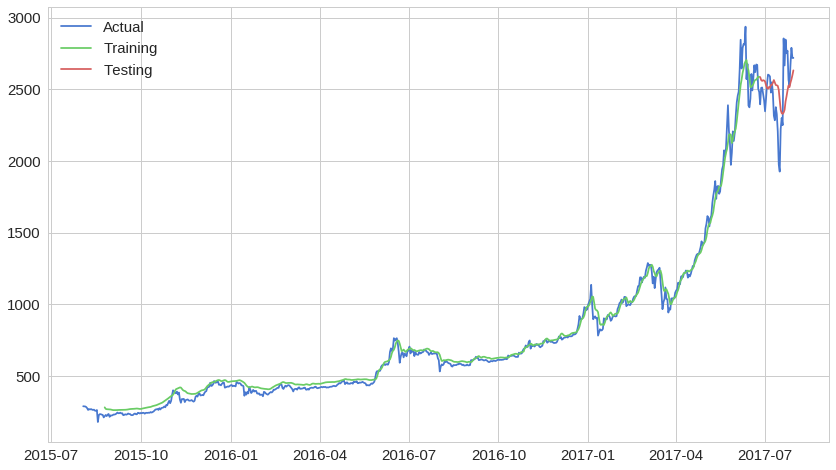

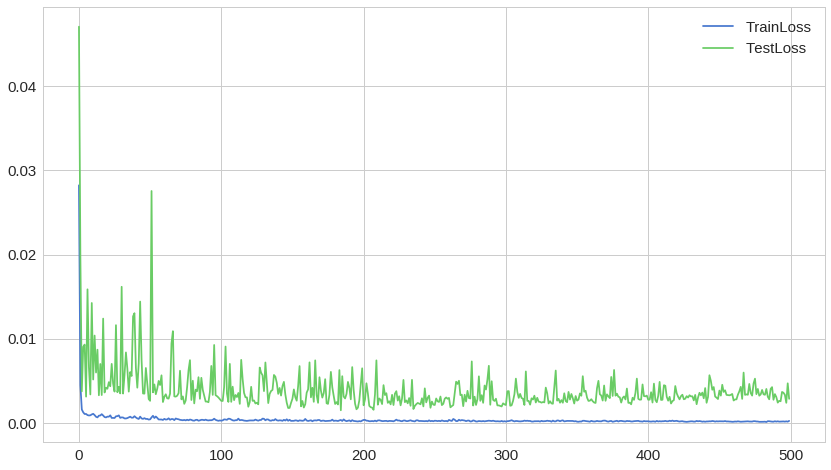

In [6]:
USDT_BTC = nextDayPrediction('USDT_BTC', 'poloniex')

In [ ]:
USDT_LTC = nextDayPrediction('USDT_LTC', 'poloniex')
USDT_ETH = nextDayPrediction('USDT_ETH', 'poloniex')
USDT_ETC = nextDayPrediction('USDT_ETC', 'poloniex')
USDT_XRP = nextDayPrediction('USDT_XRP', 'poloniex')

/root/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning:

pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()

/root/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()



START FIT MODEL...


In [ ]:
print ('predictionValues on', datetime.date.today())

allCurrency = ['USDT_BTC', 'USDT_LTC', 'USDT_ETH', 'USDT_ETC', 'USDT_XRP']
predictedValues = [USDT_BTC, USDT_LTC, USDT_ETH, USDT_ETC, USDT_XRP]

for index in np.arange(len(allCurrency)):
    print(allCurrency[index], '\n' , predictedValues[index] )

In [ ]:
print( "Today", time.strftime("_%d_%m_%Y"), " stock ", str(USDT_BTC.columns.values), "will be close on ", USDT_BTC.values)